# Complexity analysis of feature selection application

In [1]:

import copy
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from skrebate import ReliefF
from All_measures import *
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from FeatureSelectionComplexityEvaluation import *

In [4]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=1000,n_informative=10,n_noise=2,
                                         n_redundant_linear=4,n_redundant_nonlinear=2,
                                                     random_state=0,noise_std=0.01)



In [5]:
# Número de features informativas como k
k = len(dict_info_feature["informative"])
feature_names = X.columns.tolist()

# Ejecutamos los métodos de FS
fs_results = select_features_by_filters(X, y, feature_names, k=k)

In [6]:
# construir subconjuntos
feature_types = {}
for f in dict_info_feature["informative"]: feature_types[f] = "informative"
for f in dict_info_feature["noise"]: feature_types[f] = "noise"
for f in dict_info_feature["redundant_linear"]: feature_types[f] = "redundant_linear"
for f in dict_info_feature["redundant_nonlinear"]: feature_types[f] = "redundant_nonlinear"
subsets = build_subsets_for_complexity(feature_names, feature_types, fs_results)


In [7]:
results_total, results_classes, extras_host = evaluate_complexity_across_subsets(X, y, subsets)

In [8]:
results_all = {
    "dataset1": results_total}

comparison_table = build_comparison_table(results_all)
display(comparison_table.style.background_gradient(cmap="viridis"))

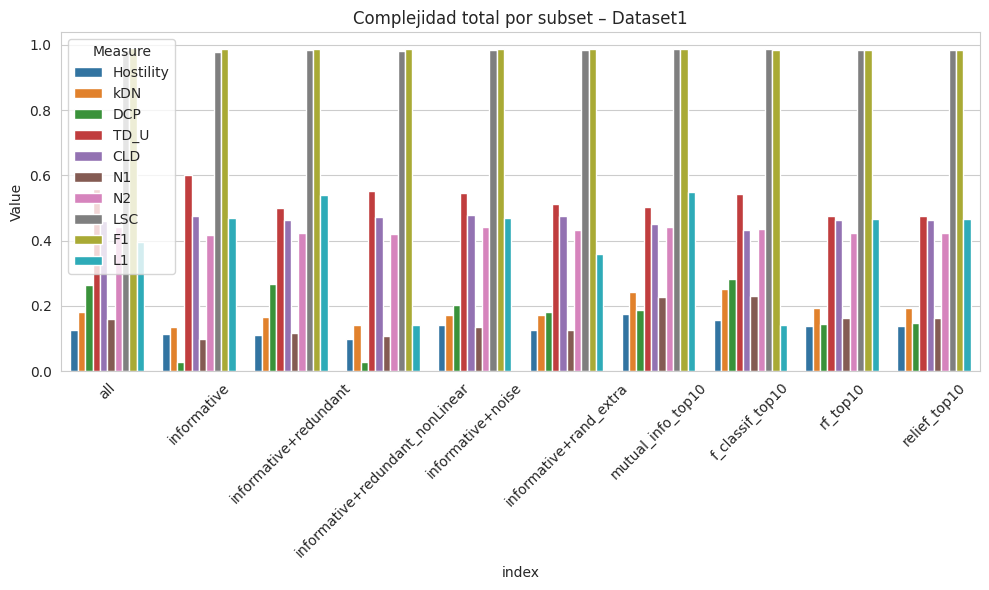

In [9]:
# Para un dataset
plot_complexity_totals(results_total, "Dataset1")

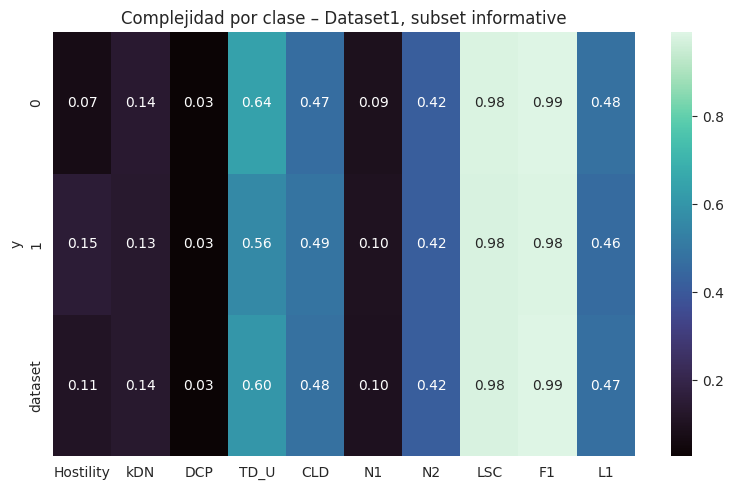

In [10]:
# Para ver detalle de un subset concreto (ej. "informative")
plot_class_complexity(results_classes["informative"], "informative", "Dataset1")

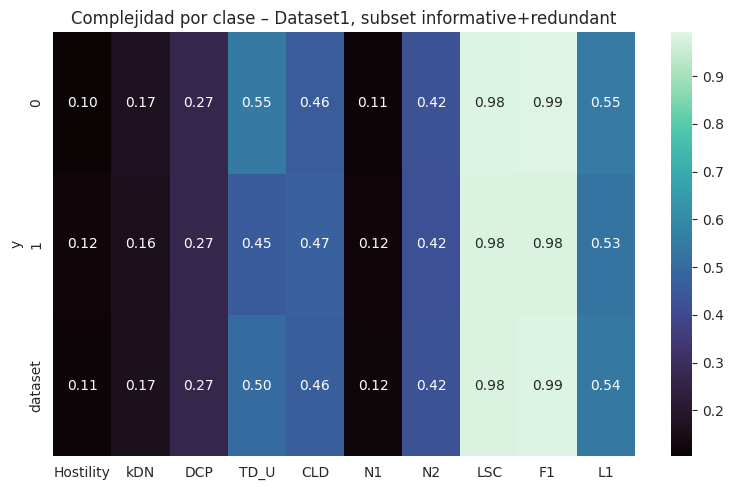

In [13]:
plot_class_complexity(results_classes["informative+redundant"], "informative+redundant", "Dataset1")

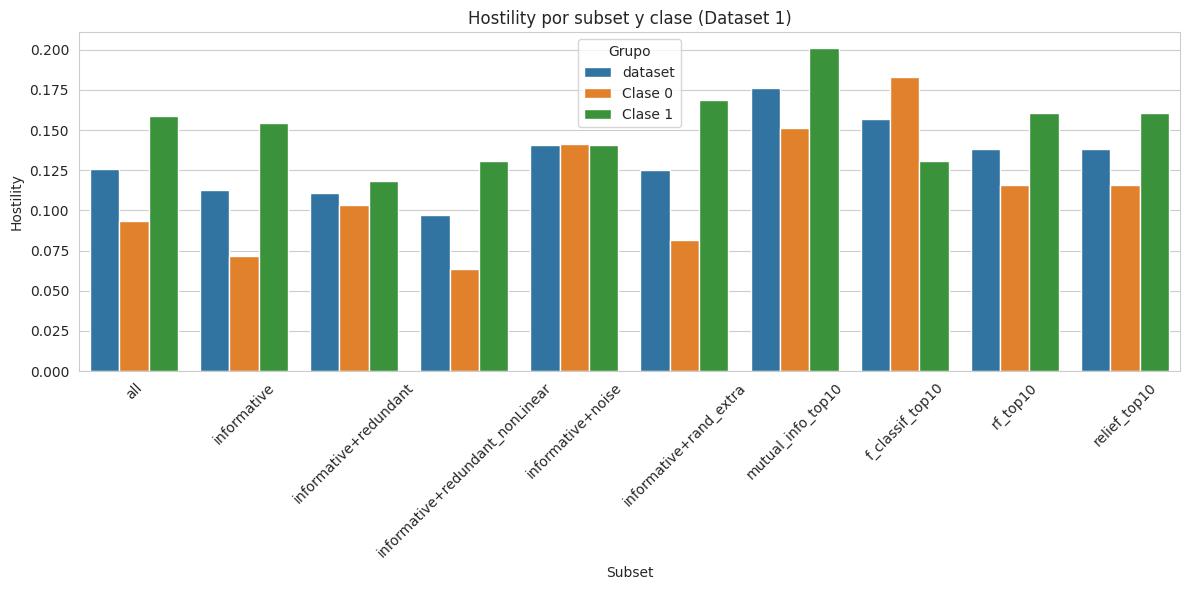

In [15]:
# Para una medida concreta
plot_across_datasets(results_total, results_classes, measure="Hostility", dataset_name="Dataset 1")

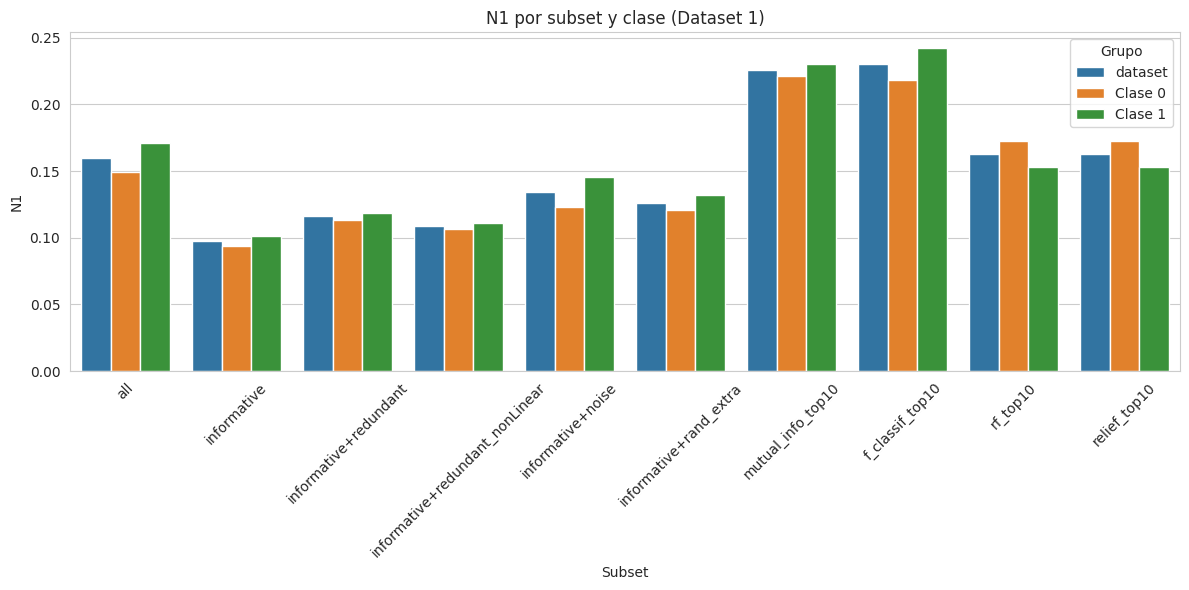

In [16]:
plot_across_datasets(results_total, results_classes, measure="N1", dataset_name="Dataset 1")

In [2]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=1000,n_informative=10,n_noise=2,
                                         n_redundant_linear=4,n_redundant_nonlinear=2,
                                                     random_state=0,noise_std=0.01)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis"))

In [3]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=1000,n_informative=25,n_noise=5,
                                         n_redundant_linear=7,n_redundant_nonlinear=8,
                                                     random_state=0,noise_std=0.05)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis"))

In [4]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=5000,n_informative=15,n_noise=15,
                                         n_redundant_linear=4,n_redundant_nonlinear=5,
                                                     random_state=10,noise_std=0.01)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis"))

In [5]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=5000,n_informative=25,n_noise=15,
                                         n_redundant_linear=8,n_redundant_nonlinear=7,
                                                     random_state=10,noise_std=0.05)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis"))

In [6]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=10000,n_informative=8,n_noise=15,
                                         n_redundant_linear=4,n_redundant_nonlinear=5,
                                                     random_state=589,noise_std=0.01)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis")) # 16 min

In [7]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=10000,n_informative=30,n_noise=10,
                                         n_redundant_linear=10,n_redundant_nonlinear=10,
                                                     random_state=589,noise_std=0.05)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis")) #25min

In [8]:
X, y, dict_info_feature = generate_synthetic_dataset(n_samples=10000,n_informative=50,n_noise=20,
                                         n_redundant_linear=20,n_redundant_nonlinear=20,
                                                     random_state=86785,noise_std=0.1)
comparison_table = FS_complexity_experiment(X, y, dict_info_feature)
display(comparison_table.style.background_gradient(cmap="viridis")) # 38 minutos

¡OJO! me falta evaluar clasificadores porque es un poco esperable que la complejidad no cambie con variables que no son ruido pero que son combinación de otras. Eso solo añade complejidad desde el punto de vista de cantidad de features, pero no de clasificación. Hay que centrar bien ese enfoque